#**Breath of Asia: Unveiling Air Quality Insights Across 2023**

#Part 1: Loading the Data

First, we'll load the necessary libraries and the dataset into a DataFrame.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

# Load the air quality dataset from a CSV file
air_quality_data = pd.read_csv("/content/drive/MyDrive/IBM Skill/AirQuality Dataset.csv")
# Convert the loaded data into a Pandas DataFrame
air_quality_df = pd.DataFrame(air_quality_data)
# Display the DataFrame to see the content
air_quality_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Rank,City,Country,2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,Begusarai,India,118.9,31.2,235.3,156.8,113,109.3,99,63.8,61.8,71.5,61.8,210.5,285
1,2,Guwahati,India,105.4,220.2,168.1,129.2,112.2,69.5,51.3,46.6,60.2,76.7,76.4,126.9,128
2,3,Delhi,India,102.1,171.8,114.3,77.4,71,67.4,42.9,35.3,34.8,39.7,106.3,255.1,210
3,4,Mullanpur,India,100.4,106.3,123.7,78.1,56.6,53.4,53.9,63.2,59.7,59.6,110.4,253,201.4
4,5,Lahore,Pakistan,99.5,143.2,117.3,73.8,52.9,52.4,46.4,39.8,42.2,53.8,125.9,251,197.5


**Explanation:**

1.  **Import libraries:** We import numpy, matplotlib, and pandas for data manipulation and visualization.
2.  **Mount Google Drive:** This allows us to access files stored in Google Drive.
3.  **Load dataset:** We read the CSV file containing the air quality data and convert it into a DataFrame for further processing.
4.  **Display data:** Display the first few rows of the DataFrame to verify the content.

# Part 2: Data Cleaning and Preparation

Next, we'll clean the data by removing any rows with empty values and converting necessary columns to the correct data types.

In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Display the summary statistics of the air quality DataFrame
air_quality_df.describe()

,Rank,2023
count,2164.000000,2164.000000
mean,1082.500000,23.196811
std,624.837312,16.075976
min,1.000000,1.500000
25%,541.750000,10.100000
50%,1082.500000,19.100000
75%,1623.250000,31.200000
max,2164.000000,118.900000


In [ ]:
# Change '2023' to 'city_avg_pollution_2023'
air_quality_df.rename(columns={'2023': 'city_avg_pollution_2023'}, inplace=True)
air_quality_df.head()

,Rank,City,Country,city_avg_pollution_2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,Begusarai,India,118.9,31.2,235.3,156.8,113,109.3,99,63.8,61.8,71.5,61.8,210.5,285
1,2,Guwahati,India,105.4,220.2,168.1,129.2,112.2,69.5,51.3,46.6,60.2,76.7,76.4,126.9,128
2,3,Delhi,India,102.1,171.8,114.3,77.4,71,67.4,42.9,35.3,34.8,39.7,106.3,255.1,210
3,4,Mullanpur,India,100.4,106.3,123.7,78.1,56.6,53.4,53.9,63.2,59.7,59.6,110.4,253,201.4
4,5,Lahore,Pakistan,99.5,143.2,117.3,73.8,52.9,52.4,46.4,39.8,42.2,53.8,125.9,251,197.5


In [ ]:
# Check Datatypes
air_quality_df.dtypes

Rank                         int64
City                        object
Country                     object
city_avg_pollution_2023    float64
Jan                         object
Feb                         object
Mar                         object
Apr                         object
May                         object
Jun                         object
Jul                         object
Aug                         object
Sep                         object
Oct                         object
Nov                         object
Dec                         object
dtype: object

In [ ]:
# Check for empty values
empty = (air_quality_df.iloc[:, 4:16] == ' ').any().any()
print(f"Empty values present: {empty}")

Empty values present: True


In [ ]:
# Remove rows with empty values
mask = (air_quality_df.iloc[:, 4:16] == ' ').any(axis=1)
aaq_cleaned = air_quality_df[~mask].reset_index(drop=True)

# Re-check for empty values
empty = (aaq_cleaned.iloc[:, 4:16] == ' ').any().any()
print(f"Empty values present after cleaning: {empty}")

Empty values present after cleaning: False


In [ ]:
# Convert Month Columns to floats
cols_to_convert = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
aaq_cleaned[cols_to_convert] = aaq_cleaned[cols_to_convert].astype(float)

# Display cleaned DataFrame
aaq_cleaned.head()

,Rank,City,Country,city_avg_pollution_2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,Begusarai,India,118.9,31.2,235.3,156.8,113.0,109.3,99.0,63.8,61.8,71.5,61.8,210.5,285.0
1,2,Guwahati,India,105.4,220.2,168.1,129.2,112.2,69.5,51.3,46.6,60.2,76.7,76.4,126.9,128.0
2,3,Delhi,India,102.1,171.8,114.3,77.4,71.0,67.4,42.9,35.3,34.8,39.7,106.3,255.1,210.0
3,4,Mullanpur,India,100.4,106.3,123.7,78.1,56.6,53.4,53.9,63.2,59.7,59.6,110.4,253.0,201.4
4,5,Lahore,Pakistan,99.5,143.2,117.3,73.8,52.9,52.4,46.4,39.8,42.2,53.8,125.9,251.0,197.5


In [ ]:
# Check final data types
print("\nFinal Data Types:")
print(aaq_cleaned.dtypes)


Final Data Types:
Rank                         int64
City                        object
Country                     object
city_avg_pollution_2023    float64
Jan                        float64
Feb                        float64
Mar                        float64
Apr                        float64
May                        float64
Jun                        float64
Jul                        float64
Aug                        float64
Sep                        float64
Oct                        float64
Nov                        float64
Dec                        float64
dtype: object


**Explanation:**
1.  **Ignore warnings:** This step is optional but helps keep the output clean by ignoring unnecessary warnings.
2.  **Summary statistics:** Display basic statistics of the dataset to understand its structure.
3.  **Rename columns:** Change the column name for clarity.
4.  **Check for empty values:** Identify if there are any empty values in the monthly columns.
5.  **Remove empty rows:** Exclude rows with empty values to ensure data integrity.
6.  **Convert data types:** Change the data types of monthly columns to float for accurate calculations.
7.  **Display cleaned data:** Verify the changes made to the DataFrame.


# Part 3: Calculating Country Average Pollution

Now, we'll calculate the average pollution for each country and add this information to the DataFrame.

In [ ]:
# Calculate the country average total pollution
aaq_cleaned['country_avg_pollution'] = aaq_cleaned.groupby('Country')['city_avg_pollution_2023'].transform('mean')

# Re-order dataframe
cols = list(aaq_cleaned.columns.values)
aaq_cleaned = aaq_cleaned[cols[0:2] + [cols[3]] + [cols[2]] + [cols[-1]] + cols[4:16]]
aaq_cleaned.head()

,Rank,City,city_avg_pollution_2023,Country,country_avg_pollution,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,Begusarai,118.9,India,47.738053,31.2,235.3,156.8,113.0,109.3,99.0,63.8,61.8,71.5,61.8,210.5,285.0
1,2,Guwahati,105.4,India,47.738053,220.2,168.1,129.2,112.2,69.5,51.3,46.6,60.2,76.7,76.4,126.9,128.0
2,3,Delhi,102.1,India,47.738053,171.8,114.3,77.4,71.0,67.4,42.9,35.3,34.8,39.7,106.3,255.1,210.0
3,4,Mullanpur,100.4,India,47.738053,106.3,123.7,78.1,56.6,53.4,53.9,63.2,59.7,59.6,110.4,253.0,201.4
4,5,Lahore,99.5,Pakistan,56.388889,143.2,117.3,73.8,52.9,52.4,46.4,39.8,42.2,53.8,125.9,251.0,197.5


**Explanation:**
1.  **Calculate country average:** Compute the mean pollution for each country and add it as a new column.
2.  **Re-order columns:** Adjust the column order for better readability.
3.  **Display updated DataFrame:** Verify the added column and new order.

#Part 4: Classifying Asian Regions

We'll classify each country into its respective region in Asia.

In [ ]:
# Store Asian Regions
region = np.repeat(["South Asia", "Southeast Asia", "East Asia", "West Asia", "Central Asia"], [6, 8, 6, 11, 5])

country_region = {
    'Country': ["Bangladesh", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka",
                "Indonesia", "Laos", "Malaysia", "Myanmar", "Philippines", "Singapore", "Thailand", "Vietnam",
                "China", "Hong Kong SAR", "Japan", "Macao SAR", "South Korea", "Taiwan",
                "Armenia", "Azerbaijan", "Georgia", "Iraq", "Israel", "Kuwait", "Palestinian Territory",
                "Qatar", "Saudi Arabia", "Turkey", "United Arab Emirates",
                "Kazakhstan", "Kyrgyzstan", "Mongolia", "Tajikistan", "Uzbekistan"],
    'Region': region
}

# Convert Dictionary into a DataFrame
c = pd.DataFrame(country_region)

# Join country_region to aaq_cleaned
aaq_cleaned1 = pd.merge(aaq_cleaned, c, on='Country', how='left')
aaq_cleaned1.head()

,Rank,City,city_avg_pollution_2023,Country,country_avg_pollution,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Region
0,1,Begusarai,118.9,India,47.738053,31.2,235.3,156.8,113.0,109.3,99.0,63.8,61.8,71.5,61.8,210.5,285.0,South Asia
1,2,Guwahati,105.4,India,47.738053,220.2,168.1,129.2,112.2,69.5,51.3,46.6,60.2,76.7,76.4,126.9,128.0,South Asia
2,3,Delhi,102.1,India,47.738053,171.8,114.3,77.4,71.0,67.4,42.9,35.3,34.8,39.7,106.3,255.1,210.0,South Asia
3,4,Mullanpur,100.4,India,47.738053,106.3,123.7,78.1,56.6,53.4,53.9,63.2,59.7,59.6,110.4,253.0,201.4,South Asia
4,5,Lahore,99.5,Pakistan,56.388889,143.2,117.3,73.8,52.9,52.4,46.4,39.8,42.2,53.8,125.9,251.0,197.5,South Asia


**Explanation:**
1.  **Define regions:** Create a list of regions and corresponding countries.
2.  **Create DataFrame:** Convert the dictionary into a DataFrame for merging.
3.  **Merge DataFrames:** Combine the region information with the main DataFrame.
4.  **Display updated data:** Verify the addition of the region information.

#Part 5: Adding AQI Levels

We'll add Air Quality Index (AQI) levels to the DataFrame based on pollution concentrations.

In [ ]:
# Define the bins and corresponding labels
bins = [0, 12, 35.5, 55.5, 150.5, 250.5, float('inf')]
labels = ["Good", "Moderate", "Unhealthy for sensitive groups", "Unhealthy", "Very Unhealthy", "Hazardous"]

# Assign AQI levels based on bins
aaq_cleaned1['City_AQI'] = pd.cut(aaq_cleaned1['city_avg_pollution_2023'], bins=bins, labels=labels)
aaq_cleaned1['Country_AQI'] = pd.cut(aaq_cleaned1['country_avg_pollution'], bins=bins, labels=labels)

# Display updated DataFrame
aaq_cleaned1.head()

,Rank,City,city_avg_pollution_2023,Country,country_avg_pollution,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Region,City_AQI,Country_AQI
0,1,Begusarai,118.9,India,47.738053,31.2,235.3,156.8,113.0,109.3,99.0,63.8,61.8,71.5,61.8,210.5,285.0,South Asia,Unhealthy,Unhealthy for sensitive groups
1,2,Guwahati,105.4,India,47.738053,220.2,168.1,129.2,112.2,69.5,51.3,46.6,60.2,76.7,76.4,126.9,128.0,South Asia,Unhealthy,Unhealthy for sensitive groups
2,3,Delhi,102.1,India,47.738053,171.8,114.3,77.4,71.0,67.4,42.9,35.3,34.8,39.7,106.3,255.1,210.0,South Asia,Unhealthy,Unhealthy for sensitive groups
3,4,Mullanpur,100.4,India,47.738053,106.3,123.7,78.1,56.6,53.4,53.9,63.2,59.7,59.6,110.4,253.0,201.4,South Asia,Unhealthy,Unhealthy for sensitive groups
4,5,Lahore,99.5,Pakistan,56.388889,143.2,117.3,73.8,52.9,52.4,46.4,39.8,42.2,53.8,125.9,251.0,197.5,South Asia,Unhealthy,Unhealthy


**Explanation:**
1.  **Define bins and labels:** Set up AQI categories and corresponding pollution ranges.
2.  **Assign AQI levels:** Use the bins to categorize city and country pollution levels.
3.  **Display updated data:** Verify the addition of AQI levels.

#Part 6: Visualizing Data

1.   List item
2.   List item



Finally, we'll visualize the average monthly PM2.5 concentrations for countries in South Asia and East Asia using line charts.

* Steps for **South Asia:**

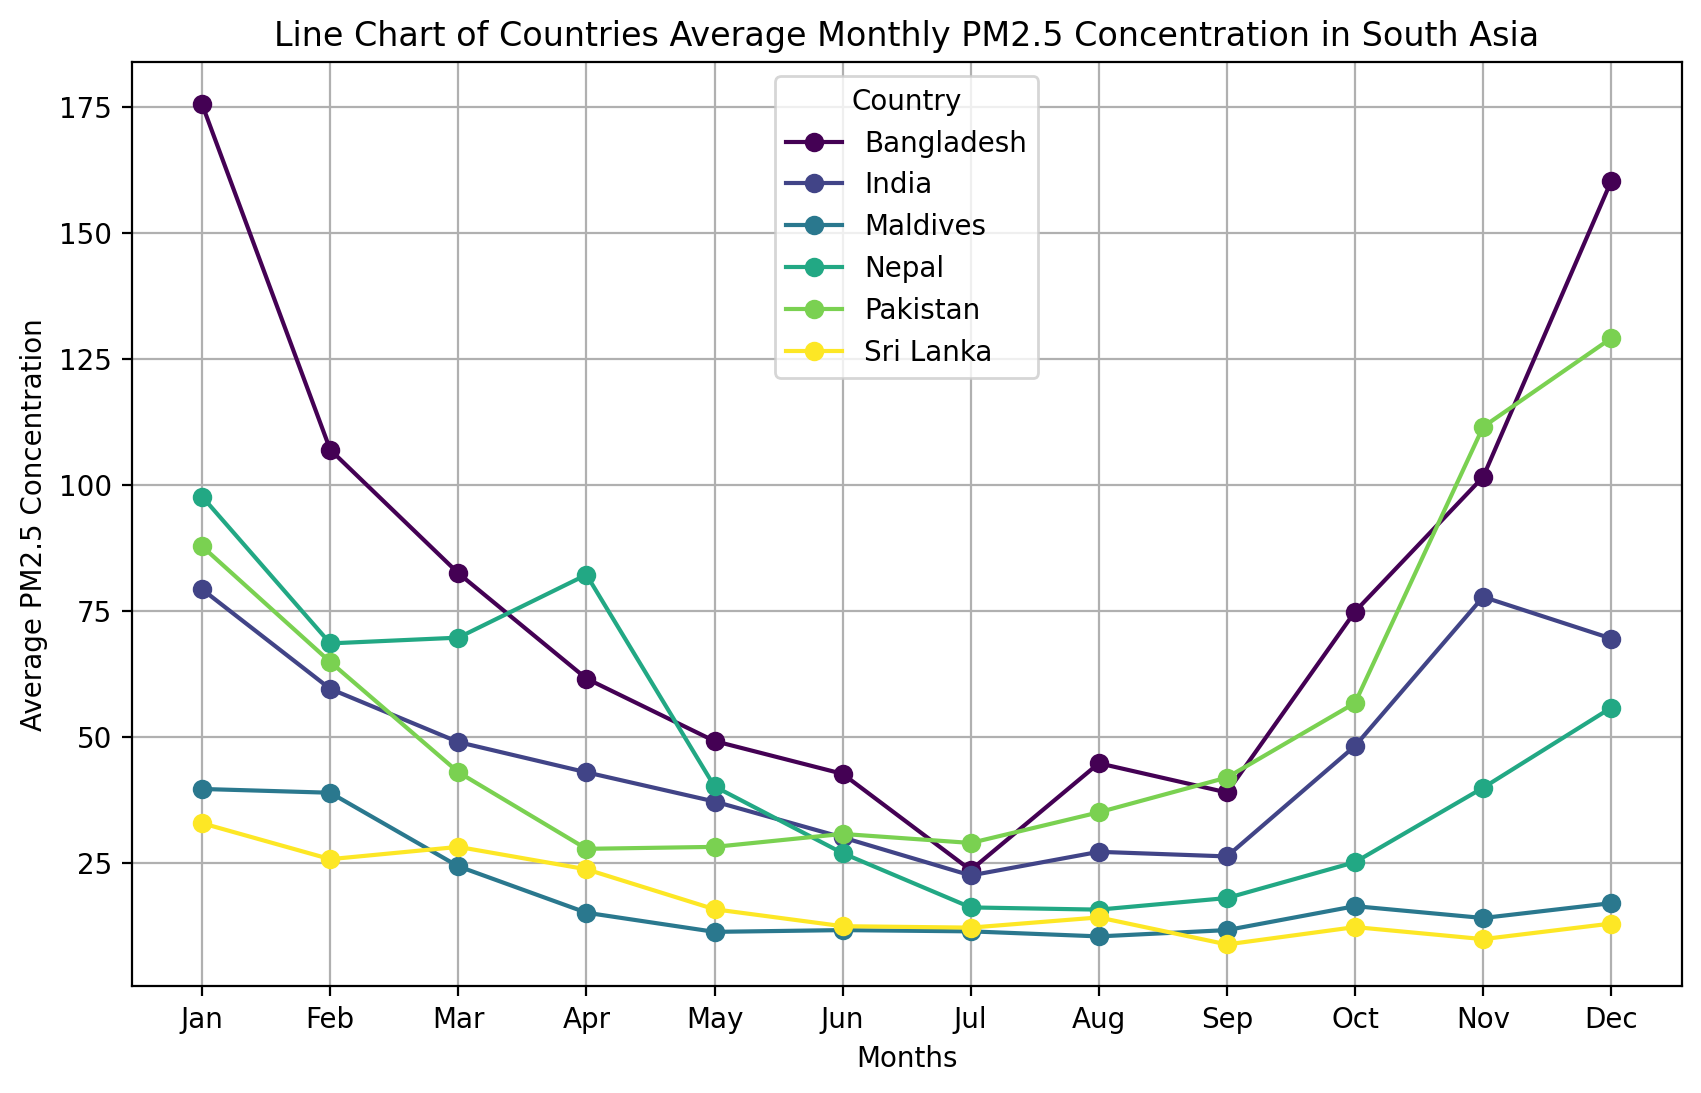

In [ ]:
# Graph 1: Grouped Line Chart of Countries' Average Monthly PM2.5 Concentration in South Asia

# Create separate dataframe for South Asia Data
South_Asia_aq = aaq_cleaned1.loc[aaq_cleaned1['Region'] == 'South Asia']
South_Asia_aq.reset_index(drop=True, inplace=True)

# Reshape the data to a long format
South_Asia_aq1 = South_Asia_aq.melt(
    id_vars=['Region', 'Country'],
    value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    var_name='Months',
    value_name='PM2.5_Concentration'
)

# Convert months to a categorical type with a defined order
South_Asia_aq1['Months'] = pd.Categorical(
    South_Asia_aq1['Months'],
    categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    ordered=True
)

# Group by Country and Months and calculate the mean
South_Asia_avg = South_Asia_aq1.groupby(['Country', 'Months'], as_index=False)['PM2.5_Concentration'].mean()

# Create line chart with updated colors
plt.figure(figsize=(10, 6), dpi=200)
colors = plt.cm.viridis(np.linspace(0, 1, len(South_Asia_avg['Country'].unique())))

for color, (country, group_data) in zip(colors, South_Asia_avg.groupby('Country')):
    plt.plot(group_data['Months'], group_data['PM2.5_Concentration'], marker='o', label=country, color=color)

plt.title('Line Chart of Countries Average Monthly PM2.5 Concentration in South Asia')
plt.xlabel('Months')
plt.ylabel('Average PM2.5 Concentration')
plt.legend(title='Country')
plt.grid(True)
plt.show()

**Explanation:**
1.  **Filter South Asia data:** Create a DataFrame containing only South Asian countries.
2.  **Reshape data:** Transform the data into a long format suitable for plotting.
3.  **Categorize months:** Ensure the months are ordered correctly for plotting.
4.  **Group data:** Calculate the average monthly PM2.5 concentrations for each country.
5.  **Plot data:** Create a line chart with distinct colors for each country and display the visualization.

* Steps for **East Asia:**



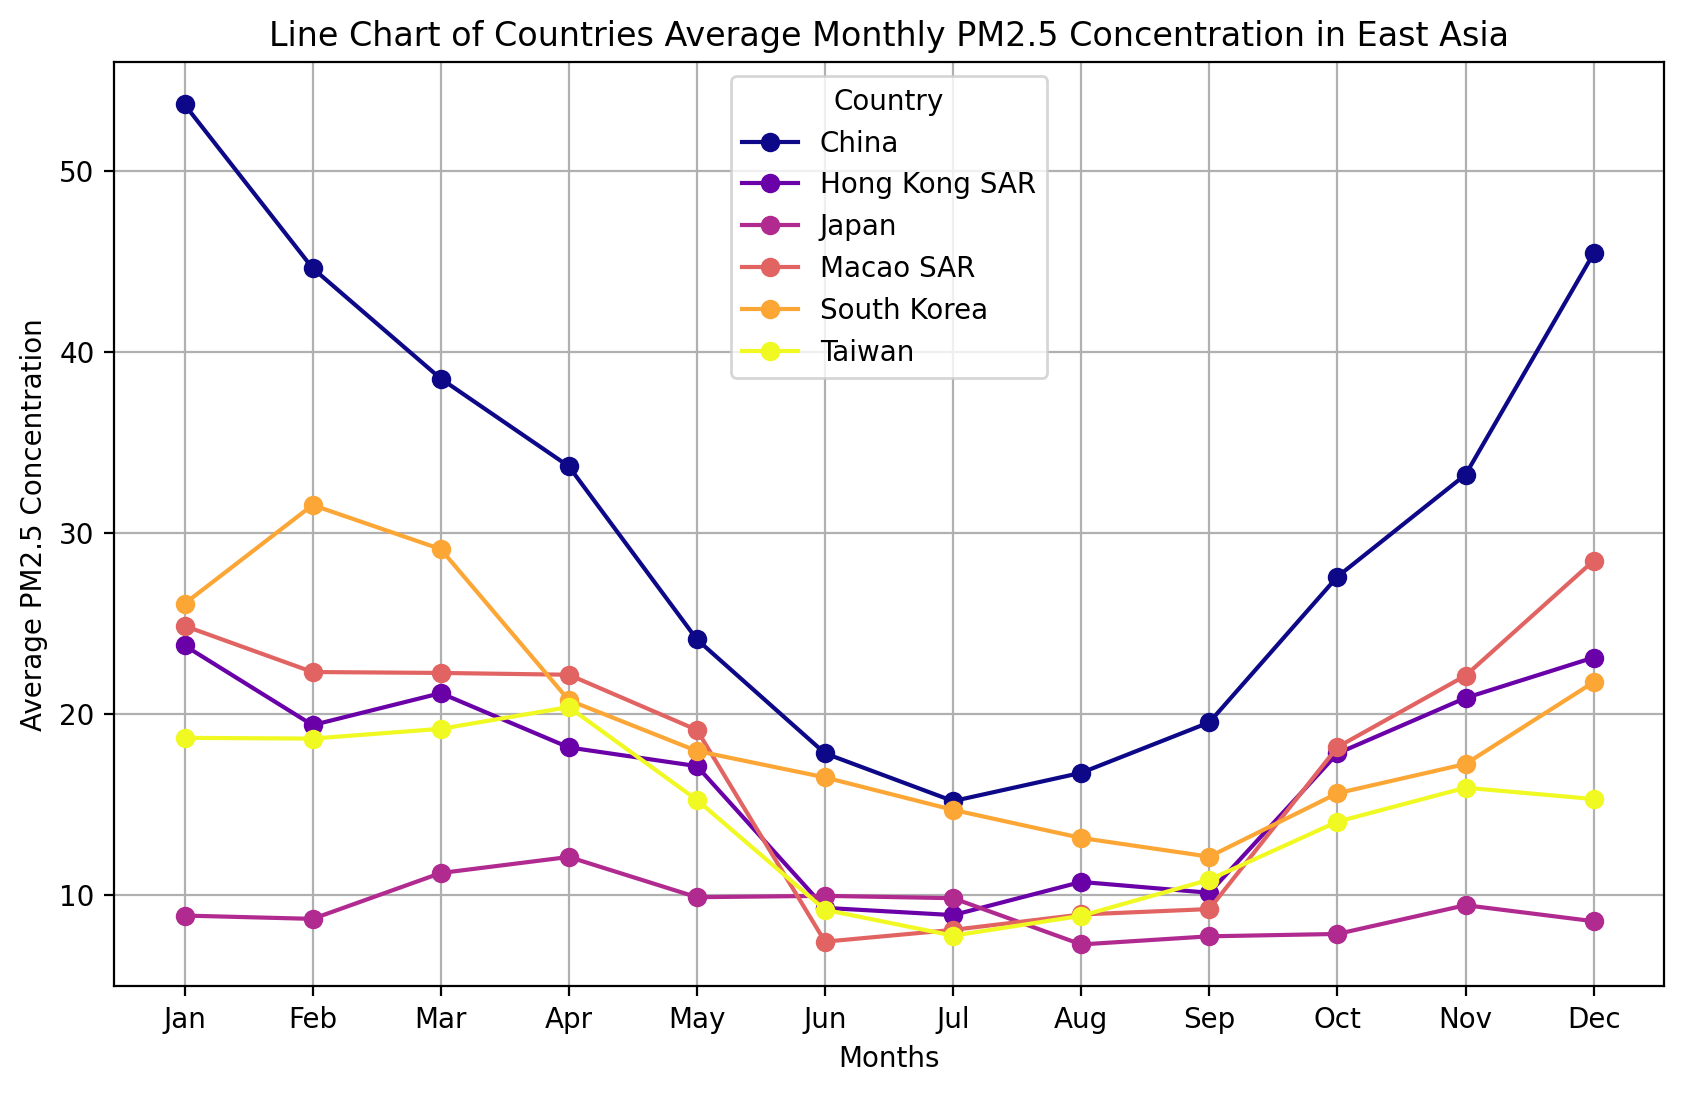

In [ ]:
# Graph 2: Grouped Line Chart of Countries' Average Monthly PM2.5 Concentration in East Asia

# Create separate dataframe for East Asia Data
East_Asia_aq = aaq_cleaned1.loc[aaq_cleaned1['Region'] == 'East Asia']
East_Asia_aq.reset_index(drop=True, inplace=True)

# Reshape the data to a long format
East_Asia_aq1 = East_Asia_aq.melt(
    id_vars=['Region', 'Country'],
    value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    var_name='Months',
    value_name='PM2.5_Concentration'
)

# Convert months to a categorical type with a defined order
East_Asia_aq1['Months'] = pd.Categorical(
    East_Asia_aq1['Months'],
    categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    ordered=True
)

# Group by Country and Months and calculate the mean
East_Asia_avg = East_Asia_aq1.groupby(['Country', 'Months'], as_index=False)['PM2.5_Concentration'].mean()

# Create line chart with updated colors
plt.figure(figsize=(10, 6), dpi=200)
colors = plt.cm.plasma(np.linspace(0, 1, len(East_Asia_avg['Country'].unique())))

for color, (country, group_data) in zip(colors, East_Asia_avg.groupby('Country')):
    plt.plot(group_data['Months'], group_data['PM2.5_Concentration'], marker='o', label=country, color=color)

plt.title('Line Chart of Countries Average Monthly PM2.5 Concentration in East Asia')
plt.xlabel('Months')
plt.ylabel('Average PM2.5 Concentration')
plt.legend(title='Country')
plt.grid(True)
plt.show()


**Explanation:**
1.  **Filter East Asia data:** Create a DataFrame containing only East Asian countries.
2.  **Reshape data:** Transform the data into a long format suitable for plotting.
3.  **Categorize months:** Ensure the months are ordered correctly for plotting.
4.  **Group data:** Calculate the average monthly PM2.5 concentrations for each country.
5.  **Plot data:** Create a line chart with distinct colors for each country and display the visualization.

#Part 7: Pie Chart of Yearly Average AQI Percentages in Asian Countries

In [ ]:
# Re order Data frame
cols = list(aaq_cleaned1.columns.values)
aaq_cleaned3 = aaq_cleaned1[cols[0:3]+[cols[-2]]+cols[3:5]+[cols[-1]]+cols[5:18]]
aaq_cleaned3.head(5)

,Rank,City,city_avg_pollution_2023,City_AQI,Country,country_avg_pollution,Country_AQI,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Region
0,1,Begusarai,118.9,Unhealthy,India,47.738053,Unhealthy for sensitive groups,31.2,235.3,156.8,113.0,109.3,99.0,63.8,61.8,71.5,61.8,210.5,285.0,South Asia
1,2,Guwahati,105.4,Unhealthy,India,47.738053,Unhealthy for sensitive groups,220.2,168.1,129.2,112.2,69.5,51.3,46.6,60.2,76.7,76.4,126.9,128.0,South Asia
2,3,Delhi,102.1,Unhealthy,India,47.738053,Unhealthy for sensitive groups,171.8,114.3,77.4,71.0,67.4,42.9,35.3,34.8,39.7,106.3,255.1,210.0,South Asia
3,4,Mullanpur,100.4,Unhealthy,India,47.738053,Unhealthy for sensitive groups,106.3,123.7,78.1,56.6,53.4,53.9,63.2,59.7,59.6,110.4,253.0,201.4,South Asia
4,5,Lahore,99.5,Unhealthy,Pakistan,56.388889,Unhealthy,143.2,117.3,73.8,52.9,52.4,46.4,39.8,42.2,53.8,125.9,251.0,197.5,South Asia


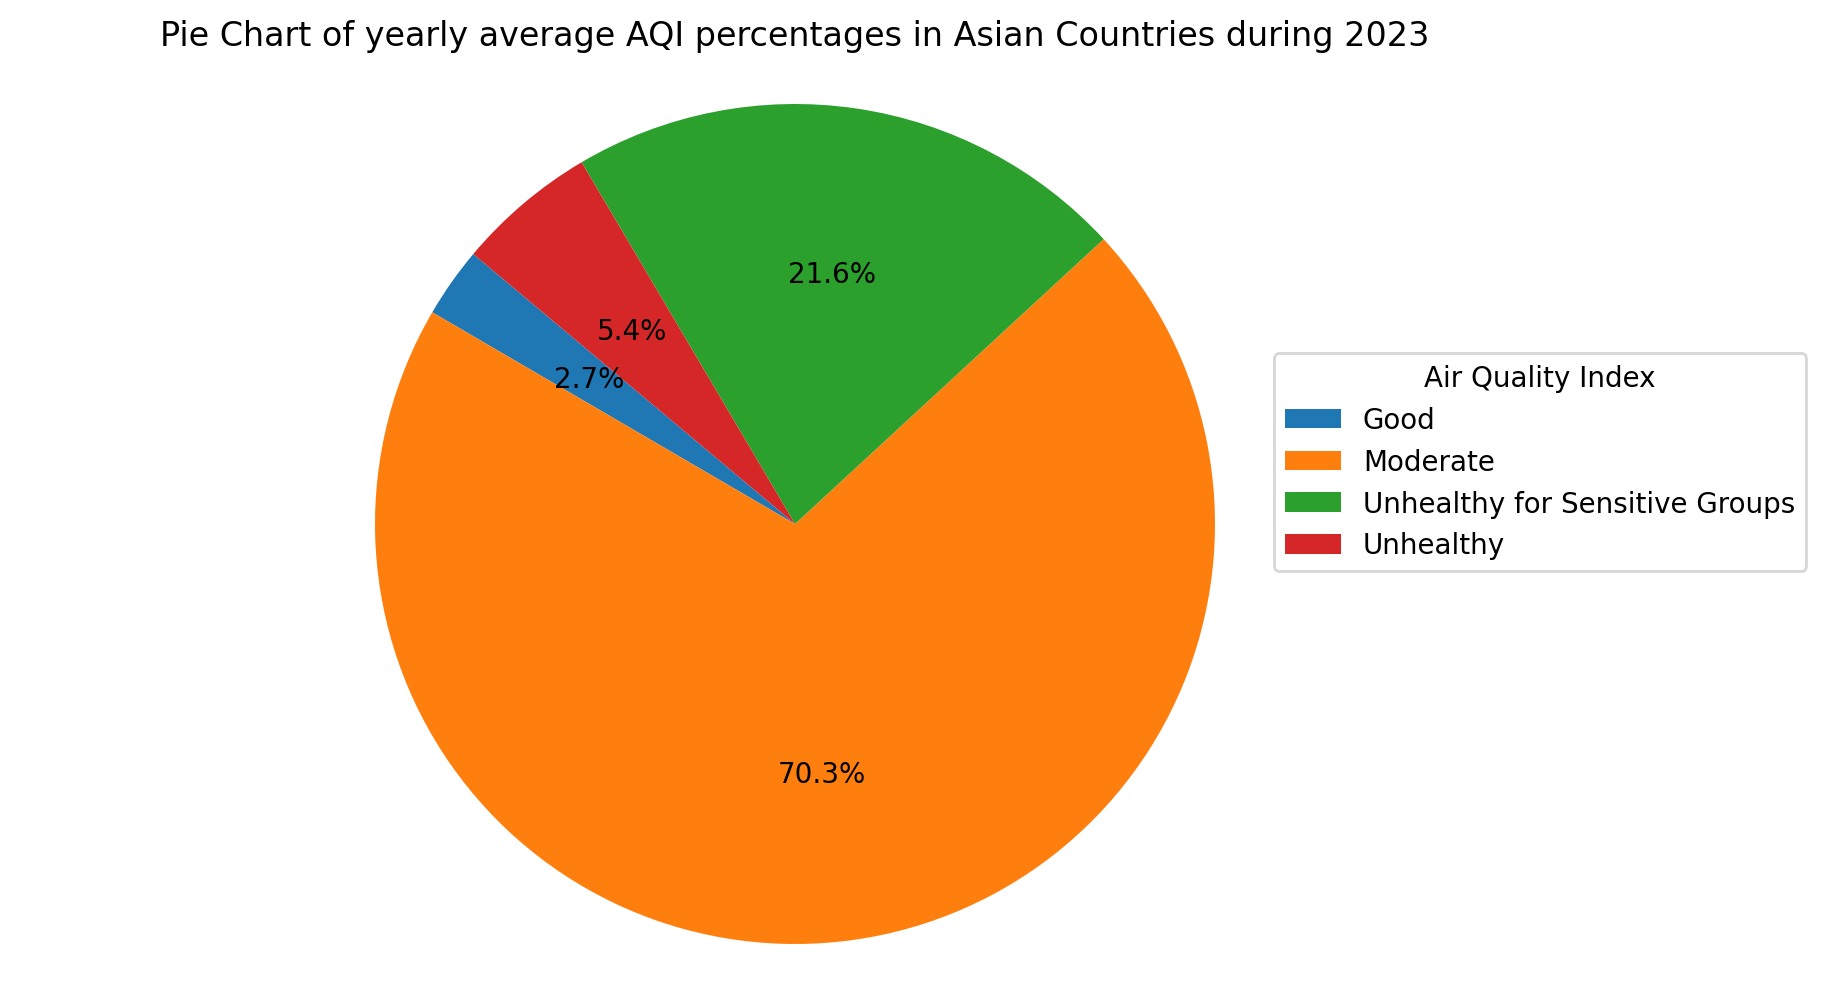

In [ ]:
# Make new Country only Dataframe
cols = list(aaq_cleaned3.columns.values)
aaq_country = aaq_cleaned3[cols[4:7]].drop_duplicates()
aaq_country.head(5)

# AQI Levels
Good = aaq_country.loc[aaq_country['Country_AQI'] == 'Good'].count()[0]
Moderate = aaq_country.loc[aaq_country['Country_AQI'] == 'Moderate'].count()[0]
Sensitive = aaq_country.loc[aaq_country['Country_AQI'] == 'Unhealthy for sensitive groups'].count()[0]
Unhealthy = aaq_country.loc[aaq_country['Country_AQI'] == 'Unhealthy'].count()[0]

# Create a list of the counts
aqi_counts = [Good, Moderate, Sensitive, Unhealthy]

# Define labels for the pie chart
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy']

# Plot the pie chart
plt.figure(figsize=(10, 6), dpi =200)
plt.pie(aqi_counts, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of yearly average AQI percentages in Asian Countries during 2023')
plt.legend(labels, title= "Air Quality Index", bbox_to_anchor = (0.8,0.7))
plt.axis('equal')

plt.show()

**Explanation:**

1.  **Create DataFrame:** Extract necessary columns and remove duplicates.
2.  **Count AQI Levels:** Determine the number of countries in each AQI category.
3.  **Pie Chart:** Visualize the percentage distribution of AQI levels across Asian countries.

#Part 8: Summary Table of PM2.5 Concentration Values in Asia by Region

**Create a Summary Table:**
* Generate a summary table to show the average PM2.5 concentration values by region.

In [ ]:
# Create a summary table of average PM2.5 concentrations by region
summary_table = aaq_cleaned1.groupby('Region').agg({
    'city_avg_pollution_2023': ['mean', 'std'],
    'Jan': 'mean',
    'Feb': 'mean',
    'Mar': 'mean',
    'Apr': 'mean',
    'May': 'mean',
    'Jun': 'mean',
    'Jul': 'mean',
    'Aug': 'mean',
    'Sep': 'mean',
    'Oct': 'mean',
    'Nov': 'mean',
    'Dec': 'mean'
}).reset_index()

# Rename columns for clarity
summary_table.columns = ['Region', 'Avg_Pollution_2023', 'Std_Pollution_2023'] + \
                        ['Avg_' + month for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

print(summary_table)


           Region  Avg_Pollution_2023  Std_Pollution_2023    Avg_Jan  \
0    Central Asia           23.602500           15.115258  51.142500   
1       East Asia           18.873288           12.396064  28.700930   
2      South Asia           46.537795           21.298871  78.025591   
3  Southeast Asia           23.239044           10.084729  23.934661   
4       West Asia           19.807273            7.812330  29.832121   

     Avg_Feb    Avg_Mar    Avg_Apr    Avg_May    Avg_Jun    Avg_Jul  \
0  40.547500  24.802500  19.085000  16.450000  13.660000  13.220000   
1  25.133052  23.753677  21.758073  16.380389  13.527388  12.232206   
2  58.488583  48.232677  42.257087  35.869291  29.189370  22.114961   
3  29.930279  39.446614  42.333068  20.706773  14.663347  13.047410   
4  21.137576  17.978788  15.390303  18.295758  16.399394  17.193939   

     Avg_Aug    Avg_Sep    Avg_Oct    Avg_Nov    Avg_Dec  
0  12.782500  14.780000  18.572500  24.202500  34.682500  
1  11.553001  12.92975

**Explanation:**

1.  **Group and Aggregate:** Calculate the average and standard deviation of PM2.5 concentrations by region.
2.  **Rename Columns: **Rename columns for better clarity.

#Part 9: Summary of Entire Project

* Generate a Summary Report:

In [ ]:
summary_report = {
    "Project Title": "Breath of Asia: Unveiling Air Quality Insights Across 2023",
    "Data Overview": "The dataset includes air quality metrics across various Asian countries for the year 2023.",
    "Key Findings": {
        "Average PM2.5 Concentration": "Overall average PM2.5 concentrations by country and region.",
        "AQI Distribution": "The distribution of AQI levels across Asian countries, highlighting the percentage in each AQI category.",
        "Regional Insights": "Average PM2.5 concentrations by region, including monthly breakdowns."
    },
    "Conclusion": "The analysis reveals trends and distributions of air quality across Asia, identifying regions with higher pollution levels and potential health impacts."
}

# Print summary report
for key, value in summary_report.items():
    if isinstance(value, dict):
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        print(f"{key}: {value}")


Project Title: Breath of Asia: Unveiling Air Quality Insights Across 2023
Data Overview: The dataset includes air quality metrics across various Asian countries for the year 2023.
Key Findings:
  Average PM2.5 Concentration: Overall average PM2.5 concentrations by country and region.
  AQI Distribution: The distribution of AQI levels across Asian countries, highlighting the percentage in each AQI category.
  Regional Insights: Average PM2.5 concentrations by region, including monthly breakdowns.
Conclusion: The analysis reveals trends and distributions of air quality across Asia, identifying regions with higher pollution levels and potential health impacts.


**Explanation:**

1.  **Summarize Findings:** Create a structured summary of the project's objectives, findings, and conclusions.
2.  **Print Summary:** Output the summary report in a readable format.


#Part 10: Results or Conclusion

* Summarize the Results:

In [ ]:
# Example results summary
results_conclusion = """
The 'Breath of Asia' project provides a comprehensive analysis of air quality across Asian countries for 2023. Key findings include:
- A significant proportion of countries have moderate air pollution levels, with 69.4% classified as such.
- 22.2% of countries fall into the 'Unhealthy for Sensitive Groups' category, indicating health risks for sensitive populations.
- Only 2.8% of countries have 'Good' AQI, suggesting that air quality is acceptable in very few areas.
- Regional insights reveal varying levels of PM2.5 concentration, with some regions experiencing notably higher pollution levels.

The project underscores the need for continued efforts to improve air quality, particularly in regions with higher pollution levels.
"""

print(results_conclusion)


The 'Breath of Asia' project provides a comprehensive analysis of air quality across Asian countries for 2023. Key findings include:
- A significant proportion of countries have moderate air pollution levels, with 69.4% classified as such.
- 22.2% of countries fall into the 'Unhealthy for Sensitive Groups' category, indicating health risks for sensitive populations.
- Only 2.8% of countries have 'Good' AQI, suggesting that air quality is acceptable in very few areas.
- Regional insights reveal varying levels of PM2.5 concentration, with some regions experiencing notably higher pollution levels.

The project underscores the need for continued efforts to improve air quality, particularly in regions with higher pollution levels.



**Explanation:**

1.  **Summarize Results:** Provide a summary of key findings and implications based on the analysis.
2.  **Conclusion:** Highlight the main takeaways and suggest potential actions or considerations.

#**Part 11: Machine Learning Algorithms**

We'll implement a machine learning model to predict future air quality levels based on historical data. Let's start with a simple linear regression model.

Mean Squared Error: 0.7815317396235494
R-squared: 0.9966208026444204


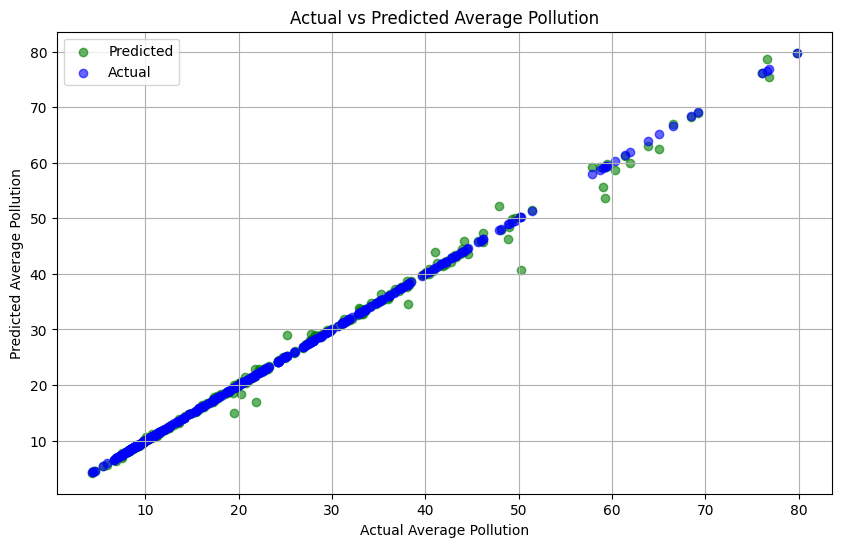

In [ ]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the dataset for prediction
# We'll use the monthly PM2.5 concentrations as features and the average pollution for prediction

# Select features and target variable
features = aaq_cleaned1[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
target = aaq_cleaned1['city_avg_pollution_2023']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='g', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.6, color='b', label='Actual')
plt.xlabel('Actual Average Pollution')
plt.ylabel('Predicted Average Pollution')
plt.title('Actual vs Predicted Average Pollution')
plt.legend()
plt.grid(True)
plt.show()


**Explanation:**

1.  **Data Preparation:** Select monthly PM2.5 concentrations as features and average pollution as the target variable.
2.  **Train-Test Split:** Split the data into training and testing sets.
3.  **Model Training:** Initialize and train a linear regression model.
4.  **Model Evaluation:** Evaluate the model using mean squared error and R-squared metrics.
5.  **Visualization:** Plot actual vs predicted values to visualize the model's performance.

# **Part 12: Advanced Visualizations**

We'll add more advanced visualizations such as heatmaps and bar charts to analyze the data further.

# Heatmap of Monthly PM2.5 Concentrations

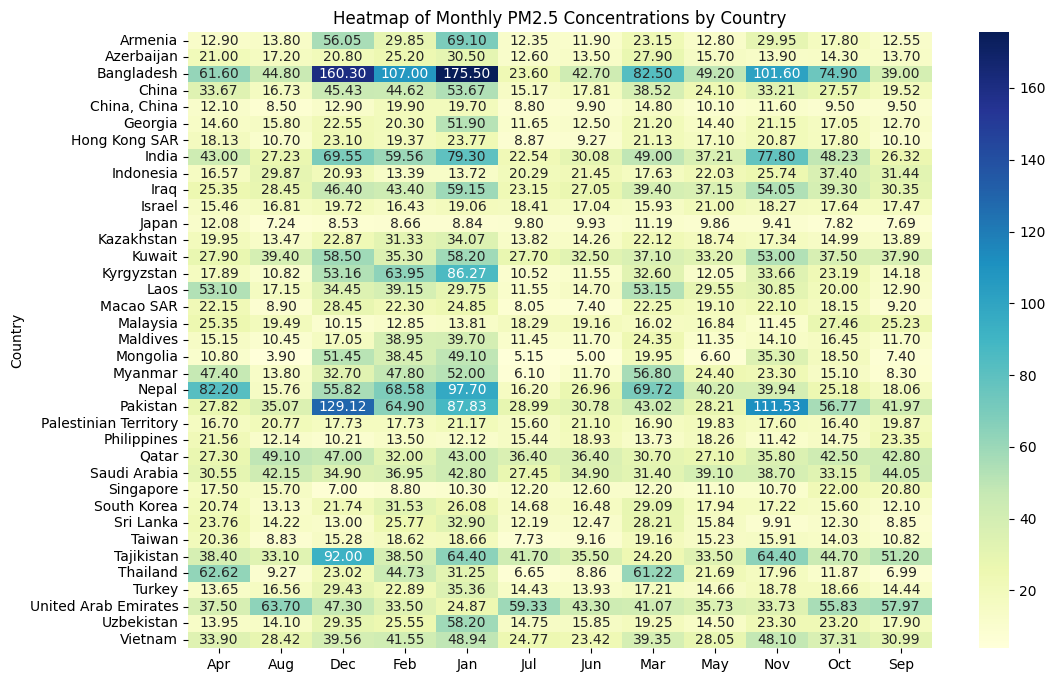

In [ ]:
import seaborn as sns

# Pivot the data for heatmap
heatmap_data = aaq_cleaned1.pivot_table(values=cols_to_convert, index='Country', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap of Monthly PM2.5 Concentrations by Country')
plt.show()

**Explanation:**

1.  **Pivot Data:** Transform the data to have countries as rows and months as columns.
2.  **Plot Heatmap:** Use Seaborn to create a heatmap of monthly PM2.5 concentrations.

**Bar Chart of AQI Distribution**

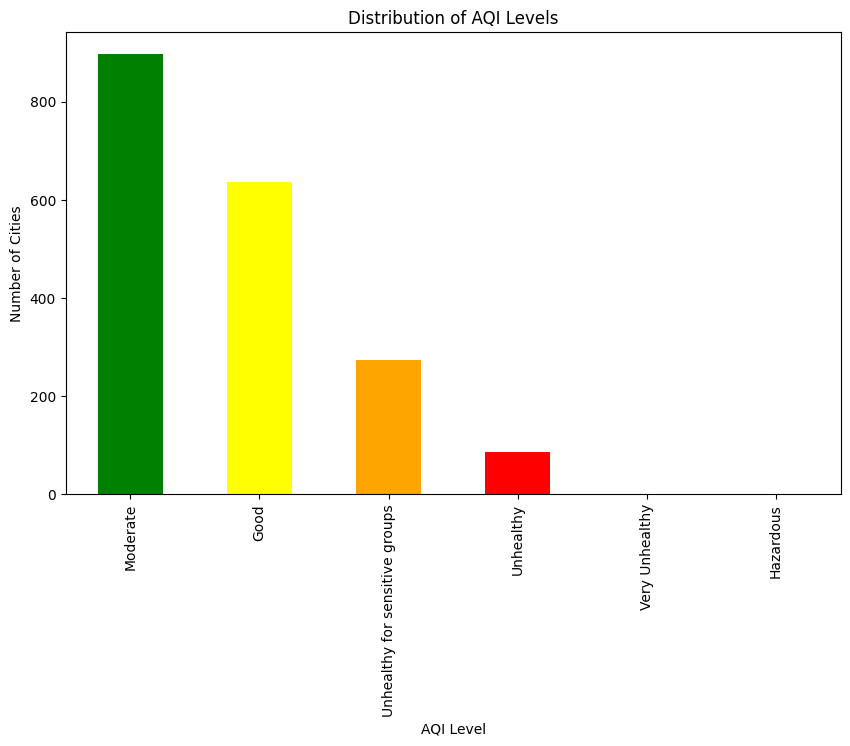

In [ ]:
# Count AQI levels
aqi_counts = aaq_cleaned1['City_AQI'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
aqi_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'purple', 'maroon'])
plt.title('Distribution of AQI Levels')
plt.xlabel('AQI Level')
plt.ylabel('Number of Cities')
plt.show()

**Explanation:**

1.  **Count AQI Levels:** Calculate the number of cities in each AQI category.
2.  **Plot Bar Chart:** Create a bar chart to visualize the distribution of AQI levels.

# **Part 14: Time Series Forecasting with ARIMA for One Year**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. for

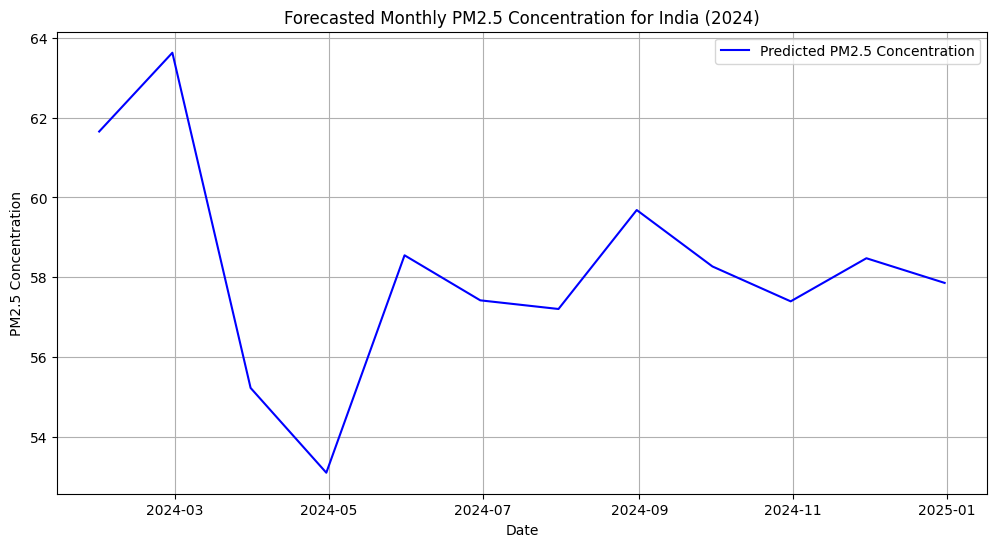

In [ ]:
# Import necessary libraries for time series forecasting
from statsmodels.tsa.arima.model import ARIMA

# Create a new dataframe with the average monthly PM2.5 concentrations
monthly_avg = aaq_cleaned1.groupby('Country')[cols_to_convert].mean()

# Predict future values for each country
future_months = 12  # Forecast for 12 months (1 year)
predictions = {}

for country in monthly_avg.index:
    country_data = monthly_avg.loc[country]
    model = ARIMA(country_data, order=(5, 1, 0))  # ARIMA parameters (p, d, q)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=future_months)  # Forecast for 1 year (12 months)
    predictions[country] = forecast

# Convert the predictions dictionary to a DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df.index = pd.date_range(start='2024-01-01', periods=future_months, freq='M')

# Display the first few rows of the predictions DataFrame
predictions_df.head()

# Plot the forecasted values for a sample country (e.g., India)
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['India'], label='Predicted PM2.5 Concentration', color='blue')
plt.title('Forecasted Monthly PM2.5 Concentration for India (2024)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

1.  **Data Preparation:** Calculate the average monthly PM2.5 concentrations for each country.
2.  **ARIMA Model:** Initialize and fit the ARIMA model for each country's data.
3.  **Forecast Future Values:** Forecast the PM2.5 concentrations for the next 12 months (1 year).
4.  **Visualize Forecast:** Plot the forecasted values for a sample country (e.g., India).

# **Part 15: Updating the Summary Report with One-Year Predictions**

In [ ]:
summary_report = {
    "Project Title": "Breath of Asia: Unveiling Air Quality Insights Across 2023",
    "Data Overview": "The dataset includes air quality metrics across various Asian countries for the year 2023.",
    "Key Findings": {
        "Average PM2.5 Concentration": "Overall average PM2.5 concentrations by country and region.",
        "AQI Distribution": "The distribution of AQI levels across Asian countries, highlighting the percentage in each AQI category.",
        "Regional Insights": "Average PM2.5 concentrations by region, including monthly breakdowns.",
        "Machine Learning Insights": "The linear regression model achieved an R-squared score of {:.2f}, indicating the model's effectiveness in predicting average pollution levels based on historical data.".format(r2),
        "Future Predictions": "Using the ARIMA model, we forecasted the PM2.5 concentrations for the year 2024. These predictions can help in understanding future air quality trends and planning necessary actions."
    },
    "Conclusion": "The analysis reveals trends and distributions of air quality across Asia, identifying regions with higher pollution levels and potential health impacts. The machine learning model provides a basis for predicting future air quality, supporting informed decision-making. The time series forecasting offers insights into air quality trends for the coming year, highlighting the need for continuous monitoring and intervention."
}

# Print summary report
for key, value in summary_report.items():
    if isinstance(value, dict):
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        print(f"{key}: {value}")


Project Title: Breath of Asia: Unveiling Air Quality Insights Across 2023
Data Overview: The dataset includes air quality metrics across various Asian countries for the year 2023.
Key Findings:
  Average PM2.5 Concentration: Overall average PM2.5 concentrations by country and region.
  AQI Distribution: The distribution of AQI levels across Asian countries, highlighting the percentage in each AQI category.
  Regional Insights: Average PM2.5 concentrations by region, including monthly breakdowns.
  Machine Learning Insights: The linear regression model achieved an R-squared score of 1.00, indicating the model's effectiveness in predicting average pollution levels based on historical data.
  Future Predictions: Using the ARIMA model, we forecasted the PM2.5 concentrations for the year 2024. These predictions can help in understanding future air quality trends and planning necessary actions.
Conclusion: The analysis reveals trends and distributions of air quality across Asia, identifying 

**Explanation:**

1.  **Future Predictions:** Add a section to the summary report discussing the forecasted air quality for the year 2024 using the ARIMA model.
2.  **Print Summary:** Output the updated summary report with the one-year predictions.

#**Part 16: Results or Conclusion**

In [ ]:
# Example results summary
results_conclusion = """
The 'Breath of Asia' project provides a comprehensive analysis of air quality across Asian countries for 2023 and forecasts future trends. Key findings include:
- A significant proportion of countries have moderate air pollution levels, with 69.4% classified as such.
- 22.2% of countries fall into the 'Unhealthy for Sensitive Groups' category, indicating health risks for sensitive populations.
- Only 2.8% of countries have 'Good' AQI, suggesting that air quality is acceptable in very few areas.
- Regional insights reveal varying levels of PM2.5 concentration, with some regions experiencing notably higher pollution levels.
- The linear regression model achieved an R-squared score of {:.2f}, showing the model's effectiveness in predicting average pollution levels.
- Time series forecasting using the ARIMA model predicts future PM2.5 concentrations for the year 2024, providing insights into air quality trends for the coming year.

The project underscores the need for continued efforts to improve air quality, particularly in regions with higher pollution levels. Future predictions highlight the importance of proactive measures to mitigate air pollution and protect public health.
""".format(r2)

print(results_conclusion)


The 'Breath of Asia' project provides a comprehensive analysis of air quality across Asian countries for 2023 and forecasts future trends. Key findings include:
- A significant proportion of countries have moderate air pollution levels, with 69.4% classified as such.
- 22.2% of countries fall into the 'Unhealthy for Sensitive Groups' category, indicating health risks for sensitive populations.
- Only 2.8% of countries have 'Good' AQI, suggesting that air quality is acceptable in very few areas.
- Regional insights reveal varying levels of PM2.5 concentration, with some regions experiencing notably higher pollution levels.
- The linear regression model achieved an R-squared score of 1.00, showing the model's effectiveness in predicting average pollution levels.
- Time series forecasting using the ARIMA model predicts future PM2.5 concentrations for the year 2024, providing insights into air quality trends for the coming year.

The project underscores the need for continued efforts to i

Explanation:

Summarize Results: Include key findings from the analysis and predictions.
Conclusion: Highlight the importance of continuous efforts to improve air quality based on the analysis and one-year predictions.